In [51]:
# Import Dependencies
import os
from dotenv import load_dotenv
import requests
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.techindicators import TechIndicators
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [52]:
# RUN ONCE
load_dotenv()
API_KEY = os.getenv('SPECIAL_API_KEY')

In [53]:
# RUN ONCE
params = {
 'function': 'CRYPTO_INTRADAY',
 'symbol': 'ETH',
 'market': 'USD',
 'interval': '5min',
 'time_zone': 'US/Eastern Time',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
price_data = r.json()
print(price_data.keys())
r.close()

https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol=ETH&market=USD&interval=5min&time_zone=US%2FEastern+Time&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Time Series Crypto (5min)'])


In [54]:
price_df = pd.DataFrame(price_data['Time Series Crypto (5min)']).T
print(price_data['Meta Data'])
price_df.reset_index(inplace=True)
price_df['date.utc'] = price_df['index']
price_df = price_df.drop('index', 1)
price_df.head()

{'1. Information': 'Crypto Intraday (5min) Time Series', '2. Digital Currency Code': 'ETH', '3. Digital Currency Name': 'Ethereum', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2021-12-29 00:35:00', '7. Interval': '5min', '8. Output Size': 'Compact', '9. Time Zone': 'UTC'}


/tmp/ipykernel_285/2187447110.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  price_df = price_df.drop('index', 1)


,1. open,2. high,3. low,4. close,5. volume,date.utc
0,3802.62000,3804.90000,3795.25000,3798.37000,186,2021-12-29 00:35:00
1,3809.18000,3809.18000,3795.54000,3802.63000,707,2021-12-29 00:30:00
2,3812.28000,3813.26000,3806.84000,3809.18000,569,2021-12-29 00:25:00
3,3817.40000,3819.70000,3811.57000,3812.28000,472,2021-12-29 00:20:00
4,3818.51000,3820.50000,3810.00000,3817.39000,960,2021-12-29 00:15:00


In [55]:
# RUN ONCE
params = {
 'function': 'BBANDS',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'time_period': '20',
 'series_type': 'close',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
bband_data = r.json()
print(bband_data.keys())
r.close()

https://www.alphavantage.co/query?function=BBANDS&symbol=ETHUSD&interval=5min&time_period=20&series_type=close&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: BBANDS'])


In [56]:
bbands_df = pd.DataFrame(bband_data['Technical Analysis: BBANDS']).T
print(bband_data['Meta Data'])
bbands_df.reset_index(inplace=True)
bbands_df['date.est1'] = bbands_df['index']
bbands_df = bbands_df.drop('index', 1)
bbands_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Bollinger Bands (BBANDS)', '3: Last Refreshed': '2021-12-28 19:35:00', '4: Interval': '5min', '5: Time Period': 20, '6.1: Deviation multiplier for upper band': 2, '6.2: Deviation multiplier for lower band': 2, '6.3: MA Type': 0, '7: Series Type': 'close', '8: Time Zone': 'US/Eastern Time'}


/tmp/ipykernel_285/2181832318.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bbands_df = bbands_df.drop('index', 1)


,Real Middle Band,Real Lower Band,Real Upper Band,date.est1
0,3806.4455,3789.4866,3823.4044,2021-12-28 19:35
1,3807.0580,3790.4283,3823.6877,2021-12-28 19:30
2,3807.4480,3790.8863,3824.0097,2021-12-28 19:25
3,3807.4890,3790.9063,3824.0717,2021-12-28 19:20
4,3807.1095,3790.6357,3823.5833,2021-12-28 19:15


In [57]:
# RUN ONCE
params = {
 'function': 'MACD',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'series_type': 'close',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
macd_data = r.json()
print(macd_data.keys())
r.close()

https://www.alphavantage.co/query?function=MACD&symbol=ETHUSD&interval=5min&series_type=close&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: MACD'])


In [58]:
macd_df = pd.DataFrame(macd_data['Technical Analysis: MACD']).T
print(macd_data['Meta Data'])
macd_df.reset_index(inplace=True)
macd_df['date.est2'] = macd_df['index']
macd_df = macd_df.drop('index', 1)
macd_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Moving Average Convergence/Divergence (MACD)', '3: Last Refreshed': '2021-12-28 19:35:00', '4: Interval': '5min', '5.1: Fast Period': 12, '5.2: Slow Period': 26, '5.3: Signal Period': 9, '6: Series Type': 'close', '7: Time Zone': 'US/Eastern'}


/tmp/ipykernel_285/1630572137.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  macd_df = macd_df.drop('index', 1)


,MACD,MACD_Signal,MACD_Hist,date.est2
0,-1.2339,-1.0959,-0.1379,2021-12-28 19:35
1,-0.4450,-1.0614,0.6164,2021-12-28 19:30
2,-0.0039,-1.2155,1.2117,2021-12-28 19:25
3,-0.1077,-1.5185,1.4108,2021-12-28 19:20
4,-0.5542,-1.8712,1.3170,2021-12-28 19:15


In [59]:
# RUN ONCE
params = {
 'function': 'VWAP',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
vwap_data = r.json()
print(vwap_data.keys())
r.close()

https://www.alphavantage.co/query?function=VWAP&symbol=ETHUSD&interval=5min&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: VWAP'])


In [60]:
vwap_df = pd.DataFrame(vwap_data['Technical Analysis: VWAP']).T
print(vwap_data['Meta Data'])
vwap_df.reset_index(inplace=True)
vwap_df['date.est3'] = vwap_df['index']
vwap_df = vwap_df.drop('index', 1)
vwap_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Volume Weighted Average Price (VWAP)', '3: Last Refreshed': '2021-12-28 19:35:00', '4: Interval': '5min', '5: Time Zone': 'US/Eastern'}


/tmp/ipykernel_285/3144706710.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  vwap_df = vwap_df.drop('index', 1)


,VWAP,date.est3
0,3861.7788,2021-12-28 19:35
1,3861.8342,2021-12-28 19:30
2,3861.9942,2021-12-28 19:25
3,3862.1078,2021-12-28 19:20
4,3862.1938,2021-12-28 19:15


In [61]:
df = price_df.join(bbands_df, how = 'left')
df = df.join(macd_df, how = 'left')
df = df.join(vwap_df, how = 'left')
df.head()

,1. open,2. high,3. low,4. close,5. volume,date.utc,Real Middle Band,Real Lower Band,Real Upper Band,date.est1,MACD,MACD_Signal,MACD_Hist,date.est2,VWAP,date.est3
0,3802.62000,3804.90000,3795.25000,3798.37000,186,2021-12-29 00:35:00,3806.4455,3789.4866,3823.4044,2021-12-28 19:35,-1.2339,-1.0959,-0.1379,2021-12-28 19:35,3861.7788,2021-12-28 19:35
1,3809.18000,3809.18000,3795.54000,3802.63000,707,2021-12-29 00:30:00,3807.0580,3790.4283,3823.6877,2021-12-28 19:30,-0.4450,-1.0614,0.6164,2021-12-28 19:30,3861.8342,2021-12-28 19:30
2,3812.28000,3813.26000,3806.84000,3809.18000,569,2021-12-29 00:25:00,3807.4480,3790.8863,3824.0097,2021-12-28 19:25,-0.0039,-1.2155,1.2117,2021-12-28 19:25,3861.9942,2021-12-28 19:25
3,3817.40000,3819.70000,3811.57000,3812.28000,472,2021-12-29 00:20:00,3807.4890,3790.9063,3824.0717,2021-12-28 19:20,-0.1077,-1.5185,1.4108,2021-12-28 19:20,3862.1078,2021-12-28 19:20
4,3818.51000,3820.50000,3810.00000,3817.39000,960,2021-12-29 00:15:00,3807.1095,3790.6357,3823.5833,2021-12-28 19:15,-0.5542,-1.8712,1.3170,2021-12-28 19:15,3862.1938,2021-12-28 19:15


In [62]:
# Dictionary with original and new column names.
new_col_names = {'1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. volume': 'volume',
        'Real Middle Band': 'bband.mid',
        'Real Upper Band': 'bband.up',
        'Real Lower Band': 'bband.low',
        'MACD_Signal': 'macd.sig',
        'MACD_Hist': 'macd.hist',
        'MACD': 'macd',
        'VWAP': 'vwap'}
  
# Call rename() method. 
df.rename(columns= new_col_names,
          inplace=True)

In [63]:
df = df.drop(['date.est1', 'date.est2', 'date.est3'], 1)
df['date.utc'] = pd.to_datetime(df['date.utc'])
df = df.set_index('date.utc')

/tmp/ipykernel_285/1508849808.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['date.est1', 'date.est2', 'date.est3'], 1)


In [69]:
df['open'] = df['open'].astype(str).astype(float)
df['high'] = df['high'].astype(str).astype(float)
df['low'] = df['low'].astype(str).astype(float)
df['close'] = df['close'].astype(str).astype(float)
df['volume'] = df['volume'].astype(str).astype(float)
df['bband.low'] = df['bband.low'].astype(str).astype(float)
df['bband.up'] = df['bband.up'].astype(str).astype(float)
df['bband.mid'] = df['bband.mid'].astype(str).astype(float)
df['macd'] = df['macd'].astype(str).astype(float)
df['macd.hist'] = df['macd.hist'].astype(str).astype(float)
df['macd.sig'] = df['macd.sig'].astype(str).astype(float)
df['vwap'] = df['vwap'].astype(str).astype(float)

In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2021-12-29 00:35:00 to 2021-12-28 16:20:00
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       100 non-null    float64
 1   high       100 non-null    float64
 2   low        100 non-null    float64
 3   close      100 non-null    float64
 4   volume     100 non-null    float64
 5   bband.mid  100 non-null    float64
 6   bband.low  100 non-null    float64
 7   bband.up   100 non-null    float64
 8   macd       100 non-null    float64
 9   macd.sig   100 non-null    float64
 10  macd.hist  100 non-null    float64
 11  vwap       100 non-null    float64
dtypes: float64(12)
memory usage: 10.2 KB
None


In [71]:
df.head()

,open,high,low,close,volume,bband.mid,bband.low,bband.up,macd,macd.sig,macd.hist,vwap
date.utc,,,,,,,,,,,,
2021-12-29 00:35:00,3802.62,3804.90,3795.25,3798.37,186.0,3806.4455,3789.4866,3823.4044,-1.2339,-1.0959,-0.1379,3861.7788
2021-12-29 00:30:00,3809.18,3809.18,3795.54,3802.63,707.0,3807.0580,3790.4283,3823.6877,-0.4450,-1.0614,0.6164,3861.8342
2021-12-29 00:25:00,3812.28,3813.26,3806.84,3809.18,569.0,3807.4480,3790.8863,3824.0097,-0.0039,-1.2155,1.2117,3861.9942
2021-12-29 00:20:00,3817.40,3819.70,3811.57,3812.28,472.0,3807.4890,3790.9063,3824.0717,-0.1077,-1.5185,1.4108,3862.1078
2021-12-29 00:15:00,3818.51,3820.50,3810.00,3817.39,960.0,3807.1095,3790.6357,3823.5833,-0.5542,-1.8712,1.3170,3862.1938


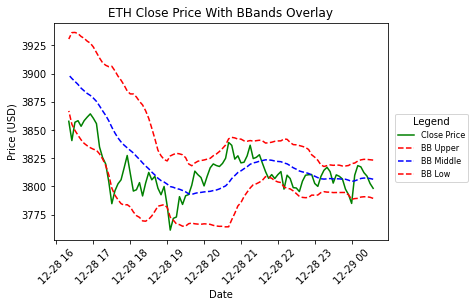

In [67]:
# Case Study 5
# Define figure and axis
fig, axs = plt.subplots(1,1)

# Set title and axes labels
axs.set_title("ETH Close Price With BBands Overlay")
axs.set_xlabel("Date")
axs.set_ylabel("Price (USD)")

# Create the plot 
axs.plot(df['close'], "-", label = "Close Price", color = "green")
axs.plot(df['bband.up'], "--", label = "BB Upper", color = "red")
axs.plot(df['bband.mid'], "--", label = "BB Middle", color = "blue")
axs.plot(df['bband.low'], "--", label = "BB Low", color = "red")
axs.legend(title = "Legend", fontsize = 8, bbox_to_anchor=(1.25, .6), loc="upper right")
plt.xticks(rotation=45)

# Show 
plt.show()

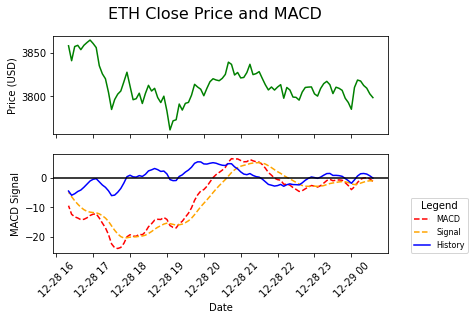

In [68]:
# Define figure and axis
fig, axs = plt.subplots(2,1, sharex=True)

# Set title and axes labels
fig.suptitle(t = "ETH Close Price and MACD", fontsize = 16)
#axs.set_title("ETH Close Price With MACD Overlay")

axs[1].set_xlabel("Date")
axs[0].set_ylabel("Price (USD)")
axs[1].set_ylabel("MACD Signal")


    
# Create the plot 
axs[0].plot(df['close'], "-", label = "Close Price", color = "green")

axs[1].plot(df['macd'], "--", label = "MACD", color = "red")
axs[1].plot(df['macd.sig'], "--", label = "Signal", color = "orange")
axs[1].plot(df['macd.hist'], "-", label = "History", color = "blue")
axs[1].legend(title = "Legend", fontsize = 8, bbox_to_anchor=(1.25, .6), loc="upper right")
plt.xticks(rotation=45)
axs[1].axhline(y=0, color = 'black')

# Show 
plt.show()

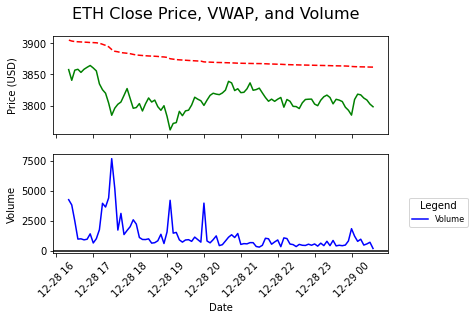

In [75]:
# Define figure and axis
fig, axs = plt.subplots(2,1, sharex=True)

# Set title and axes labels
fig.suptitle(t = "ETH Close Price, VWAP, and Volume", fontsize = 16)
#axs.set_title("ETH Close Price With MACD Overlay")

axs[1].set_xlabel("Date")
axs[0].set_ylabel("Price (USD)")
axs[1].set_ylabel("Volume")


    
# Create the plot 
axs[0].plot(df['close'], "-", label = "Close Price", color = "green")
axs[0].plot(df['vwap'], "--", label = "VWAP", color = "red")

axs[1].plot(df['volume'], "-", label = "Volume", color = "blue")

plt.legend(title = "Legend", fontsize = 8, bbox_to_anchor=(1.25, .6), loc="upper right")
plt.xticks(rotation=45)
axs[1].axhline(y=0, color = 'black')

# Show 
plt.show()

In [ ]:
# begin trading strategy